In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data, fix the file extension
df = pd.read_csv('train.csv')  # Correct the file extension to .csv
pd.set_option('display.max_columns', None)



print(df.head())

df.isna().sum()



         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0     BAT2522922      11.135007     B        C4            MORTGAGE   
1     BAT1586599      12.237563     C        D3                RENT   
2     BAT2136391      12.545884     F        D4            MORTGAGE   
3     BAT2428731      16.731201     C        C3            MORTGAGE   
4     BAT5341619      15.008300     C        D4            MORTGAGE   

   Home Ownership Verification Status Payment Plan               Loan Title  \
0    176346.62670        Not Verified            n     

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [3]:
#verificar se há valores em falta
missing_values = df.isnull().sum()


print()
print("Missing Values:")
print(missing_values)

#OK

df.head()


Missing Values:
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type               

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
#Examinar Variáveis.

value_counts = df['Accounts Delinquent'].value_counts()
print(f"Unique Elements in 'Accounts Delinquent': {value_counts}")
#Account Delinquente é sempre igual a 0. Variável irrelevante

value_counts = df['Term'].value_counts()
print(f"Term values: {value_counts}")
#Variável pouco relevante pois 99% dos valores sao 58 meses ou 59, sendo a minoria dos valores 36..

value_counts = df['Payment Plan'].value_counts()
print(f"Payment Plan unique values: {value_counts}")
#Payement plan é sempre igual a n

value_counts = df['Verification Status'].value_counts()
print(f"Verification Status unique values: {value_counts}")
#Variável binária, no entanto três tipos de entrada existem. "Source Verified", "Verified" e "Not Verified", "Source Verified -> Verified"

value_counts = df['Loan Title'].value_counts()
print(f"Loan Title unique values: {value_counts}")
#Valores categóricos com contagens irrelevantes, sensitivo à capitalização de letras. Necessita de tratamento
print(df['Loan Title'].unique())

value_counts = df['Employment Duration'].value_counts()
print(f"Employment Duration unique values: {value_counts}")
#OK

value_counts = df['Grade'].value_counts()
print(f"Grade unique values: {value_counts}")
#Ok, transformar em valores categóricos hieárquicos em numéricos, ex: A -> 0, B -> 1...

value_counts = df['Initial List Status'].value_counts()
print(f"Initial List Status values: {value_counts}")
#OK, transformar 

value_counts = df['Application Type'].value_counts()
print(f"Application Type values: {value_counts}")
#INDIVIDUAL = 67340, JOINT = 123. Variável pouco relevante

value_counts = df['Batch Enrolled'].value_counts()
print(f"Batch Enrolled values: {value_counts}")

# Convert the Series to a DataFrame
#value_counts_df = value_counts.reset_index()
#value_counts_df.columns = ['Loan Title', 'Count']


Unique Elements in 'Accounts Delinquent': 0    67463
Name: Accounts Delinquent, dtype: int64
Term values: 59    43780
58    22226
36     1457
Name: Term, dtype: int64
Payment Plan unique values: n    67463
Name: Payment Plan, dtype: int64
Verification Status unique values: Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64
Loan Title unique values: Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64
['Debt Consolidation' 'Debt consolidation' 'Credit card refinancing'
 'Home improvement' 'Credit Consolidation' 'Green loan' 'Other'
 'Moving and relocation' 'Credit Cards' 'Medi

In [5]:
df = df.drop(['Accounts Delinquent'],axis=1)
df = df.drop(['ID'] , axis=1)
df = df.drop(['Payment Plan'] , axis=1)

df['Loan Title'] = df['Loan Title'].str.lower()
len(df['Loan Title'].unique())
df['Loan Title'].unique()


array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'green loan', 'other',
       'moving and relocation', 'credit cards', 'medical expenses',
       'refinance', 'credit card consolidation', 'lending club',
       'debt consolidation loan', 'major purchase', 'vacation',
       'business', 'credit card payoff', 'credit card',
       'credit card refi', 'personal loan', 'cc refi', 'consolidate',
       'medical', 'loan 1', 'consolidation', 'card consolidation',
       'car financing', 'debt', 'home buying', 'freedom', 'consolidated',
       'get out of debt', 'consolidation loan', 'dept consolidation',
       'personal', 'cards', 'bathroom', 'refi', 'credit card loan',
       'credit card debt', 'house', 'debt consolidation 2013',
       'debt loan', 'cc refinance', 'home', 'cc consolidation',
       'credit card refinance', 'credit loan', 'payoff',
       'bill consolidation', 'credit card paydown', 'credit card pay off',
       'g

In [6]:
map_dict = {'Loan Title':{'debt consolidation':'debt consolidation', \
                'debt consolidation loan':'debt consolidation', \
                'debt consolidation 2013':'debt consolidation', \
                'dept consolidation':'debt consolidation' ,
                'credit card refinancing':'cc refi', \
                'refinance':'cc refi', \
                'cc refinance':'cc refi',\
                'credit card refinance':'cc refi',\
                'cc-refinance':'cc refi', \
                'refinance loan':'cc refi', \
                'credit card refinance loan':'cc refi',\
                'credit card refi':'cc refi', \
                'cc refi':'cc refi', \
                'refi':'cc refi'  ,
                'home improvement':'home improvement',\
                'home improvement loan':'home improvement',\
                'bathroom':'home improvement',\
                'pool':'home improvement' ,
                'home buying':'home loan',\
                'house':'home loan',\
                'home':'home loan',\
                'home loan':'home loan' ,
                'credit consolidation':'credit consolidation',\
                'consolidation loan':'credit consolidation',\
                'cc consolidation':'credit consolidation',\
                'conso':'credit consolidation',\
                'credit card consolidation':'credit consolidation',\
                'card consolidation':'credit consolidation',\
                'loan consolidation':'credit consolidation',\
                'consolidate':'credit consolidation',\
                'consolidated':'credit consolidation' ,
                'medical':'medical purpose',\
                'medical expenses':'medical purpose',\
                'medical loan':'medical purpose'  ,
                'lending club' : 'lending purpose' , \
                'lending loan' : 'lending purpose'  ,
                'business' : 'business purpose' , \
                'green loan' : 'business purpose' , \
                'moving and relocation' : 'home loan'  , \
                'credit cards' : 'credit cards payoff' , \
                'credit card' : 'credit cards payoff' , \
                'credit card loan' : 'credit cards payoff' , \
                'credit' : 'credit cards payoff' , \
                'credit card debt' : 'credit cards payoff' , \
                'cc loan' : 'credit cards payoff' , \
                'cc' : 'credit cards payoff' , \
                'cards' : 'credit cards payoff' , \
                'credit card payoff' : 'credit cards payoff' , \
                'credit pay off' : 'credit cards payoff' , \
                'credit payoff' : 'credit cards payoff' , \
                'credit loan' : 'credit cards payoff' , \
                'payoff' : 'credit cards payoff' , \
                'pay off' : 'credit cards payoff' , \
                'credit card paydown' : 'credit cards payoff' , \
                'credit card pay off' : 'credit cards payoff' ,
                'personal loan' : 'personal purpose' , \
                'personal' : 'personal purpose' , \
                'wedding loan' : 'personal purpose' , \
                'getting ahead' : 'personal purpose' , \
                'vacation' : 'personal purpose' , \
                'major purchase' : 'personal purpose'  , \
                'car financing' : 'vehicle purpose' , \
                'car loan' : 'vehicle purpose' , \
                'debt' : 'debt payoff' , \
                'get out of debt' : 'debt payoff' , \
                'debt loan' : 'debt payoff' , \
                'get debt free' : 'debt payoff' , \
                'debt payoff' : 'debt payoff' , \
                'debt free' : 'debt payoff' , \
                'freedom' : 'debt payoff' , \
                'relief' : 'debt payoff' , \
                'debt reduction' : 'debt payoff' , \
                'bill consolidation' : 'bill payoff' , \
                'bill payoff' : 'bill payoff' , \
                'pay off bills' : 'bill payoff' , \
                'bills' : 'bill payoff'  , \
                'other' : 'other purpose' , \
                'loan 1' : 'other purpose' , \
                'loan1' : 'other purpose' , \
                'loan' : 'other purpose' , \
                'myloan' : 'other purpose' , \
                'my loan' : 'other purpose' }
            }


df.replace(map_dict, inplace=True)

df['Loan Title'].unique()
len(df['Loan Title'].unique())

15

In [7]:
df['Verification Status'] = df['Verification Status'].replace('Source Verified', 'Verified')
#Corrigir Duplicação de valores

0        0
1        0
2        0
3        0
4        0
        ..
67458    1
67459    0
67460    0
67461    0
67462    0
Name: Loan Status, Length: 67463, dtype: int64
23


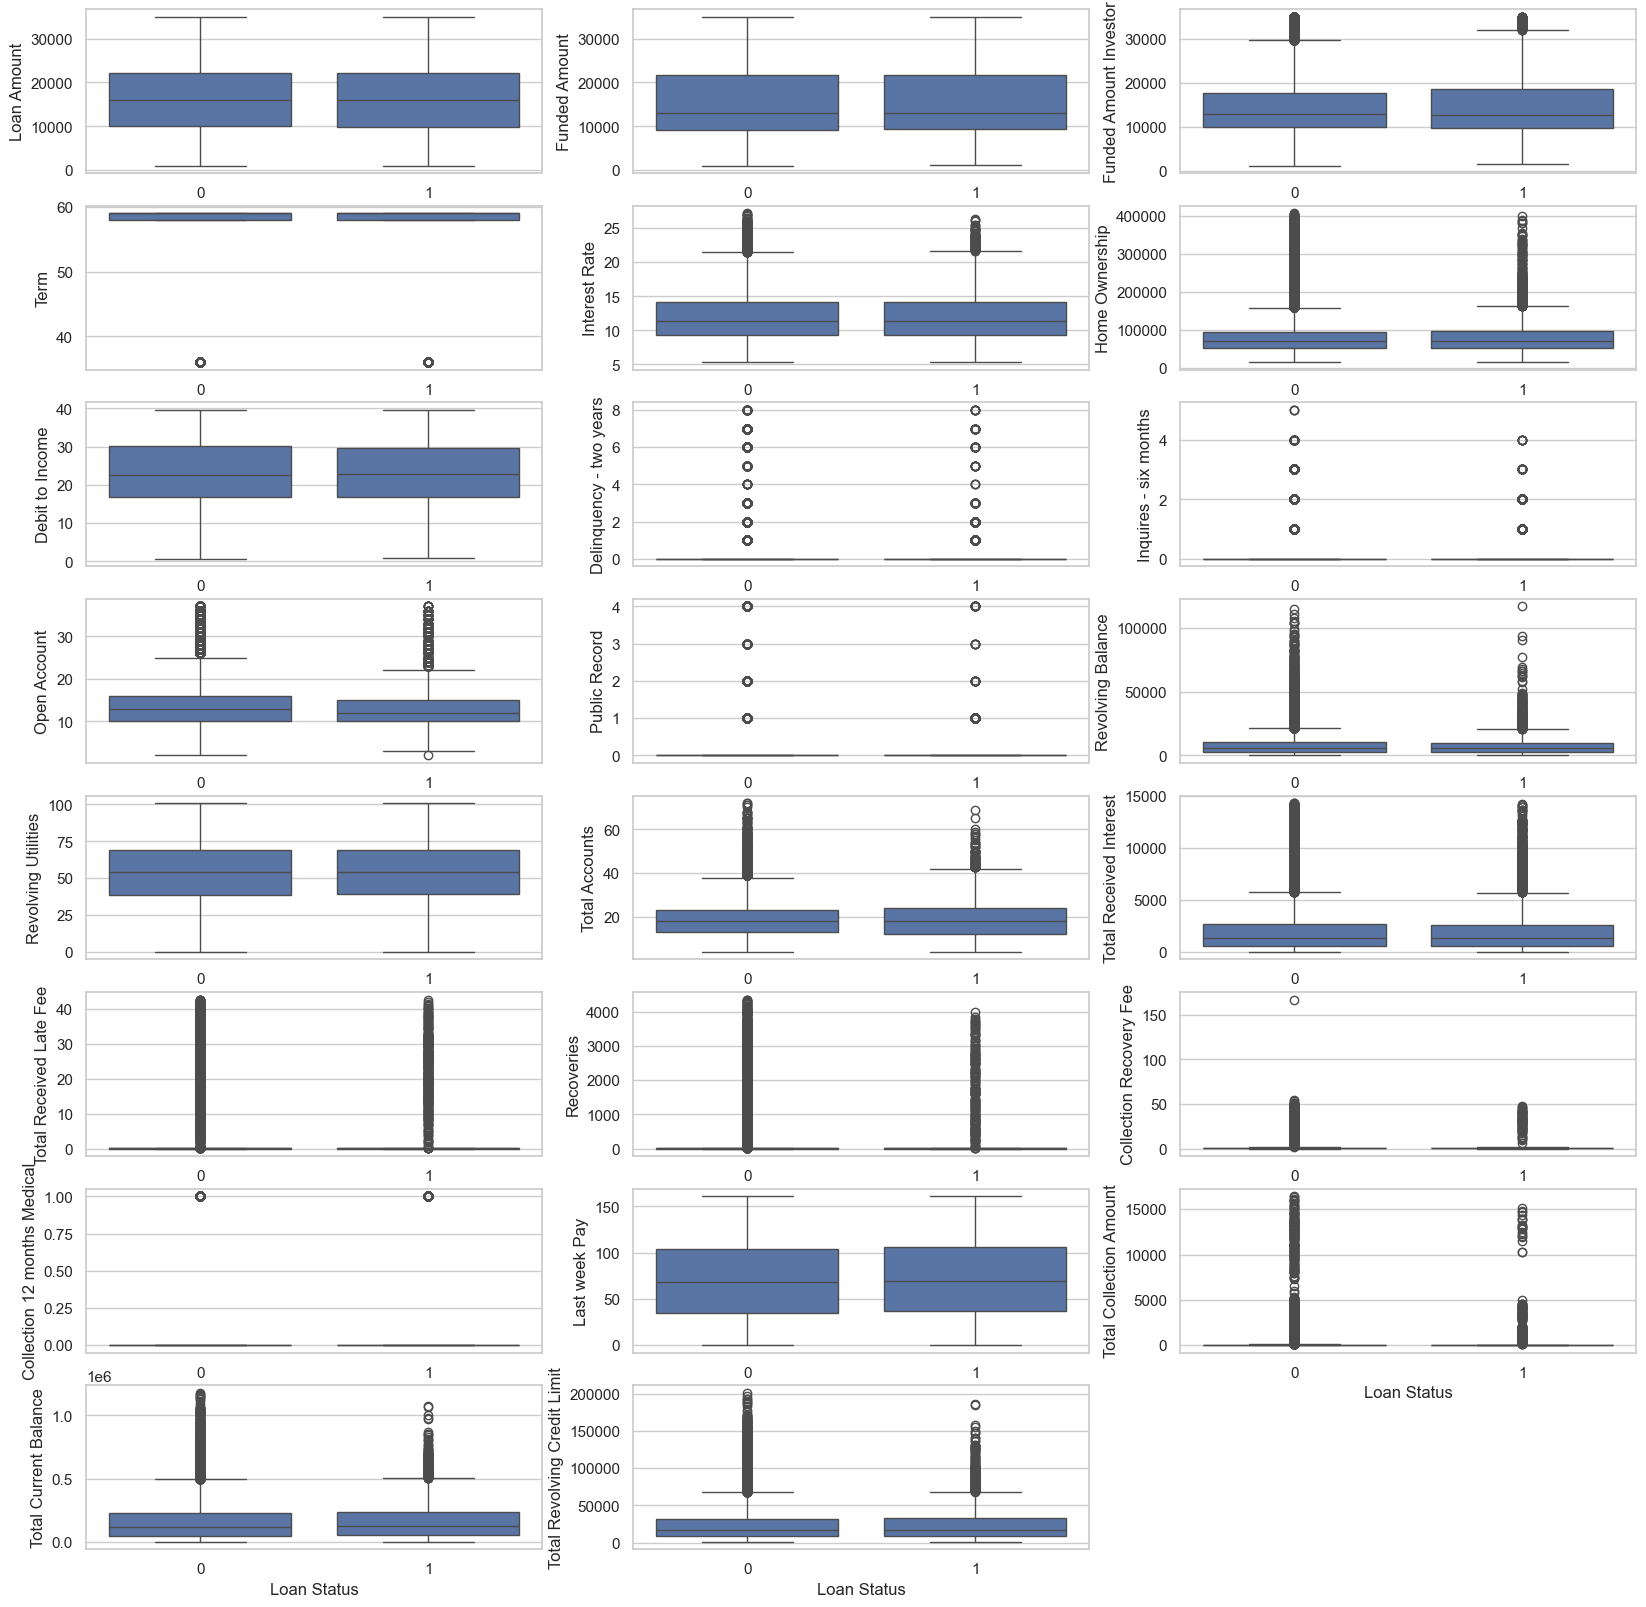

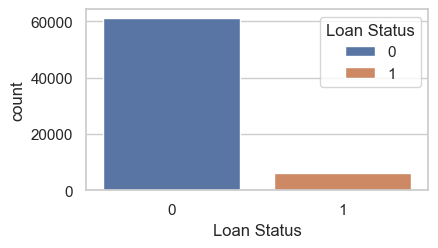

In [8]:
#Explorar graficamente o atributo 'Loan Status'
print(df['Loan Status'])

df['Loan Status'] = df['Loan Status'].astype('category')
sns.set(style="whitegrid")

# Boxplot para os atributos numéricos:
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns
print(len(numerical_attributes))

plt.figure(figsize=(20,20))
for i, column in enumerate(numerical_attributes, 1):
    plt.subplot(8, 3, i)
    sns.boxplot(x='Loan Status', y=column, data=df)

# Histograma para os atributos categóricos:
categorical_attributes = df.select_dtypes(include='category').columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(categorical_attributes, 1):
   plt.subplot(3, 3, i)
   sns.countplot(x=column, hue='Loan Status', data=df)

plt.show()

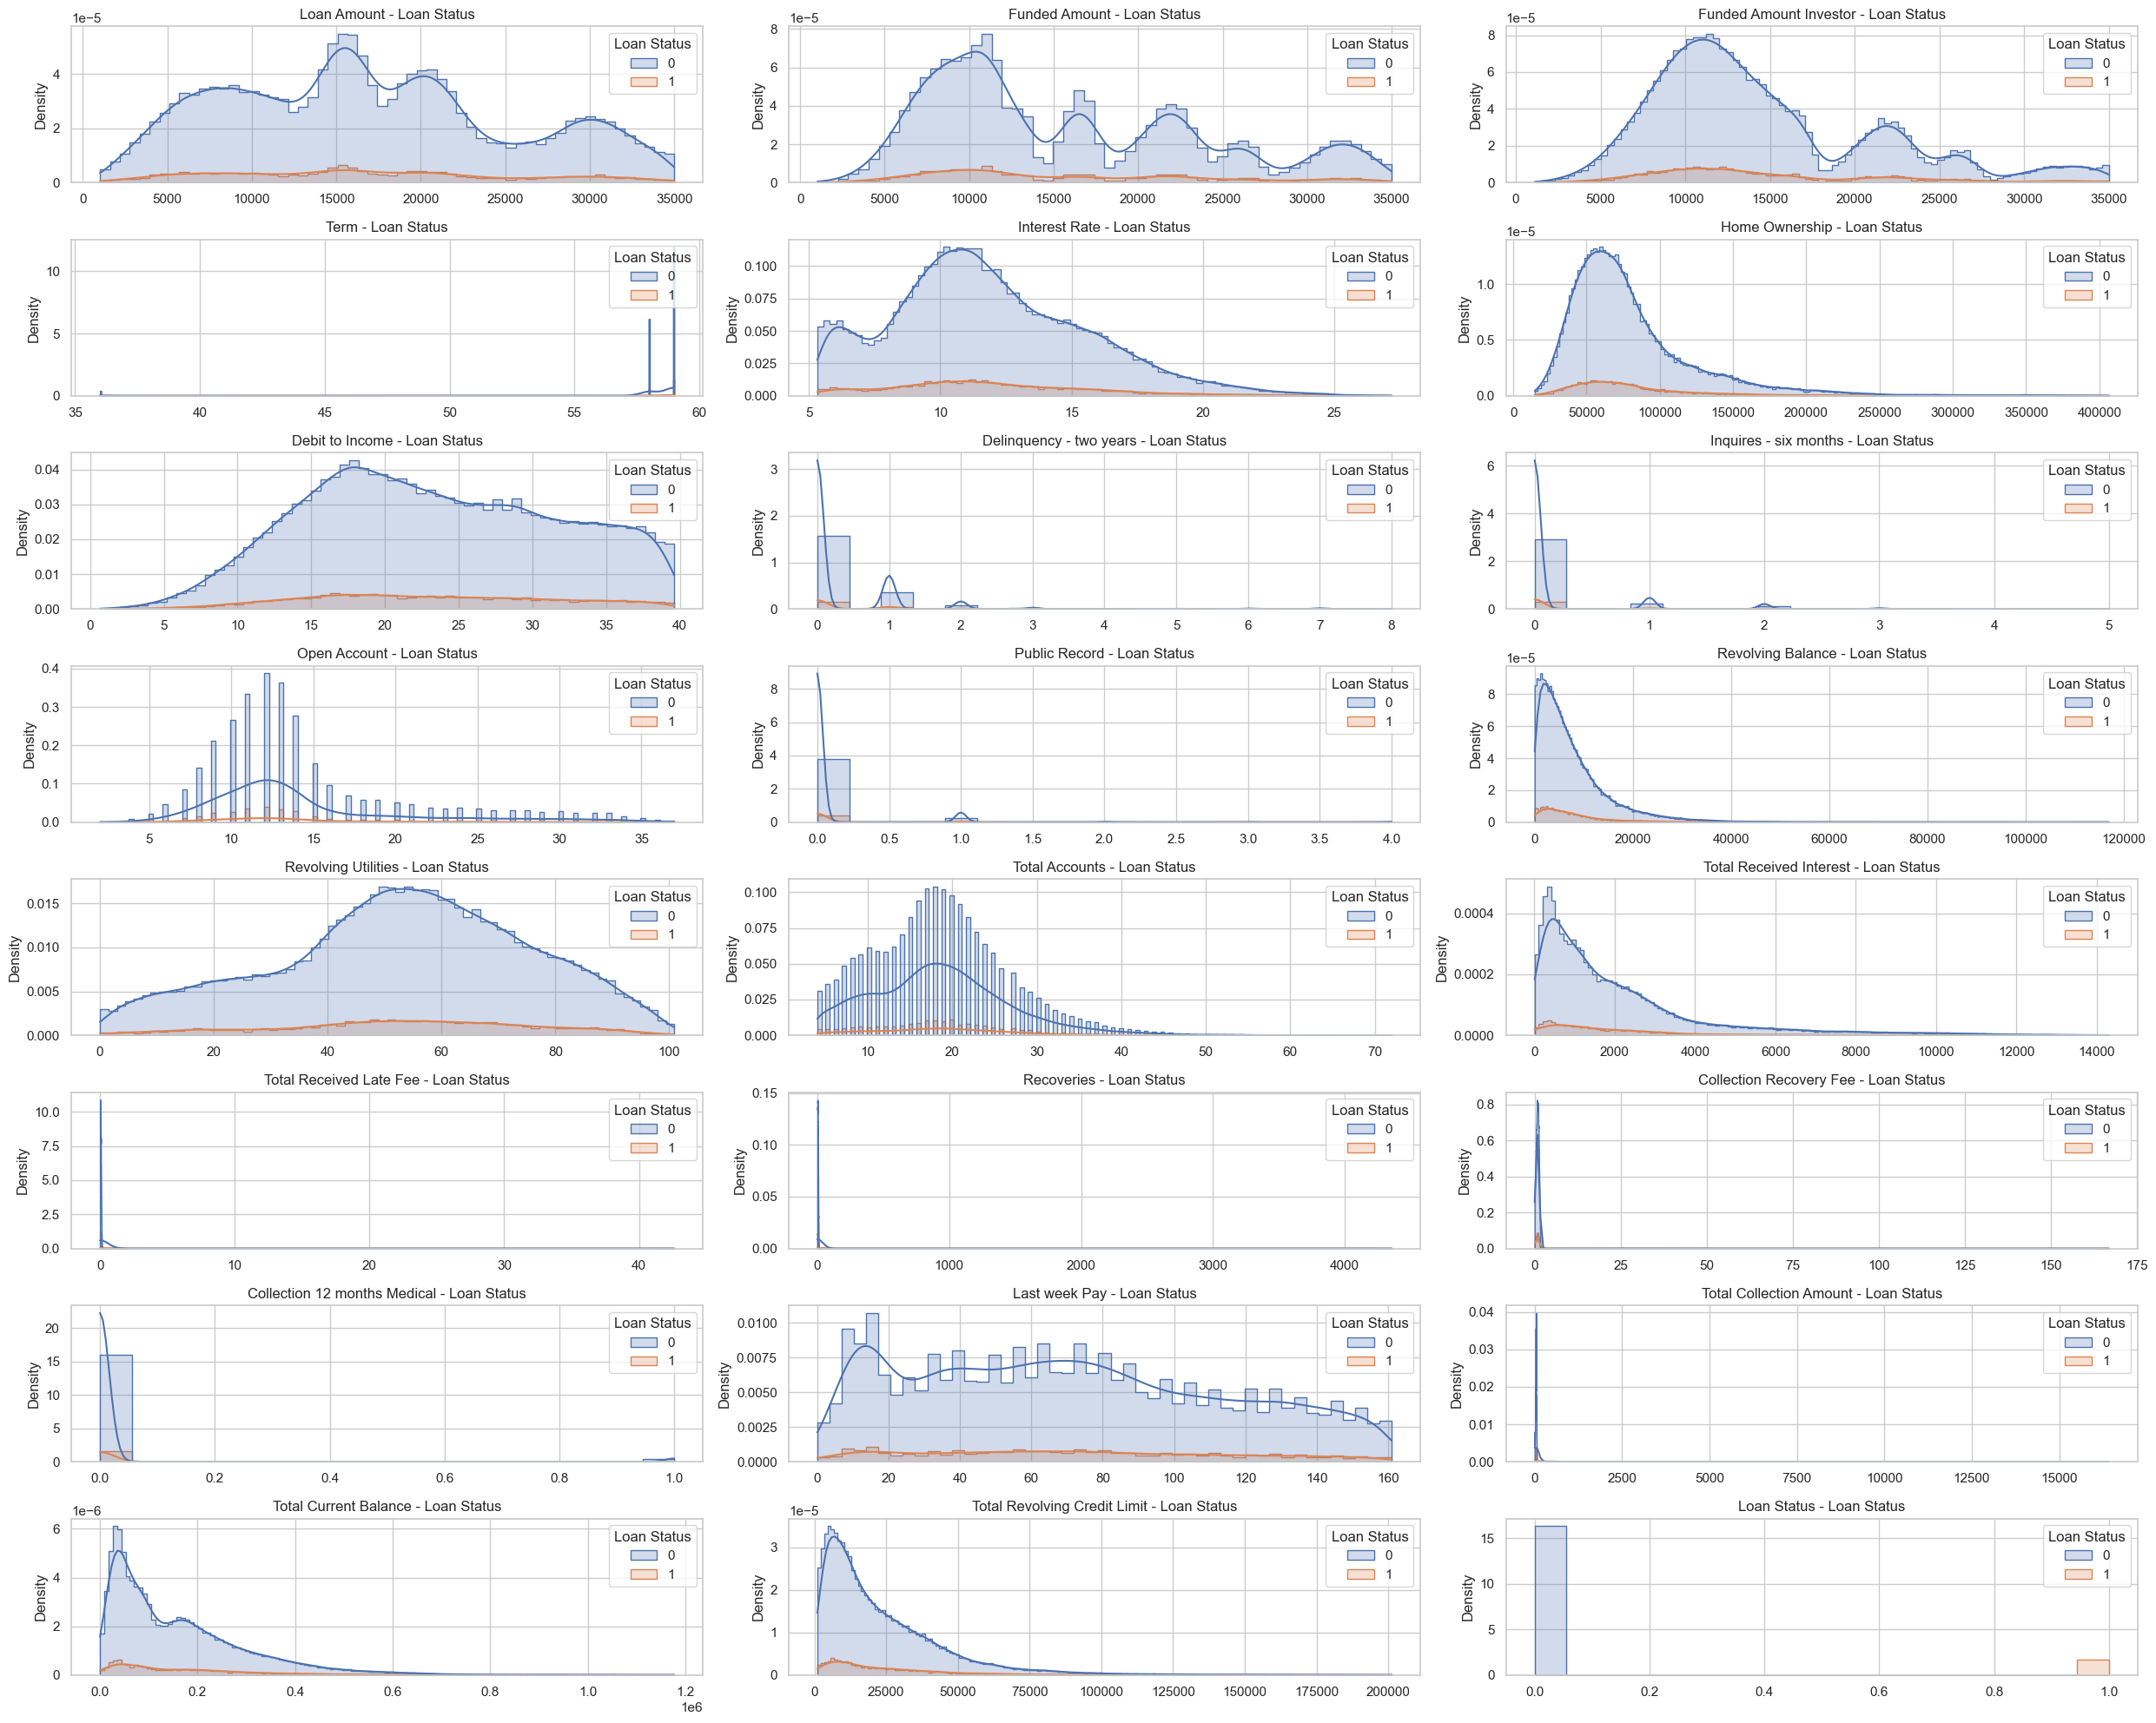

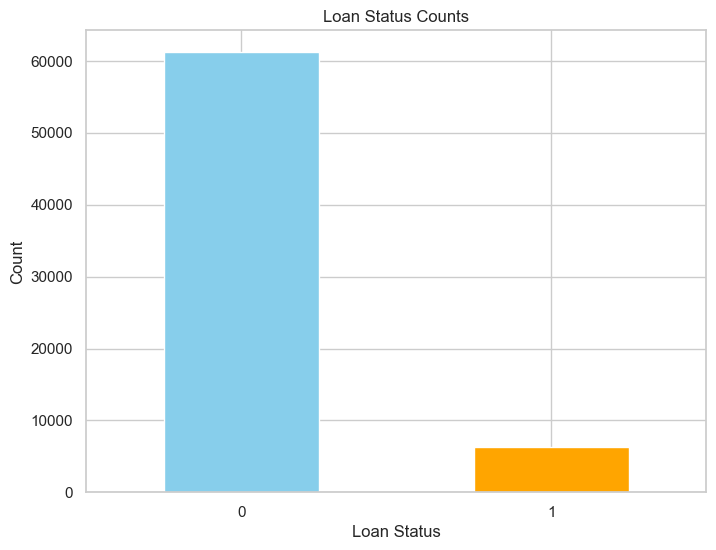

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mudar a coluna do Loan Status para numérica
df['Loan Status'] = df['Loan Status'].astype('int64')

# Boxplot for the numerical attributes
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns

# Adjust the figure size and layout
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for i, column in enumerate(numerical_attributes, 1):
    ax = plt.subplot(8, 3, i)
    sns.histplot(data=df, x=column, hue='Loan Status', kde=True, element="step", stat="density")
    
    # Set an empty label for the x-axis
    ax.set_xlabel("")
    
    # Set the title without overlapping x-axis numbers of the plot above
    ax.set_title(f"{column} - Loan Status")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Loan Status counts
loan_status_counts = df['Loan Status'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  object 
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Employment Duration           67463 non-null  object 
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,debt consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Verified,debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Verified,debt consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Verified,debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Verified,cc refi,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0


In [11]:
data_types_all_columns = df.dtypes
print("Data Types of All Columns:")
print(data_types_all_columns)

Data Types of All Columns:
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64
Collection Re

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

print(len(numeric_cols), len(categorical_cols))
numeric_cols, categorical_cols

24 8


(['Loan Amount',
  'Funded Amount',
  'Funded Amount Investor',
  'Term',
  'Interest Rate',
  'Home Ownership',
  'Debit to Income',
  'Delinquency - two years',
  'Inquires - six months',
  'Open Account',
  'Public Record',
  'Revolving Balance',
  'Revolving Utilities',
  'Total Accounts',
  'Total Received Interest',
  'Total Received Late Fee',
  'Recoveries',
  'Collection Recovery Fee',
  'Collection 12 months Medical',
  'Last week Pay',
  'Total Collection Amount',
  'Total Current Balance',
  'Total Revolving Credit Limit',
  'Loan Status'],
 ['Batch Enrolled',
  'Grade',
  'Sub Grade',
  'Employment Duration',
  'Verification Status',
  'Loan Title',
  'Initial List Status',
  'Application Type'])

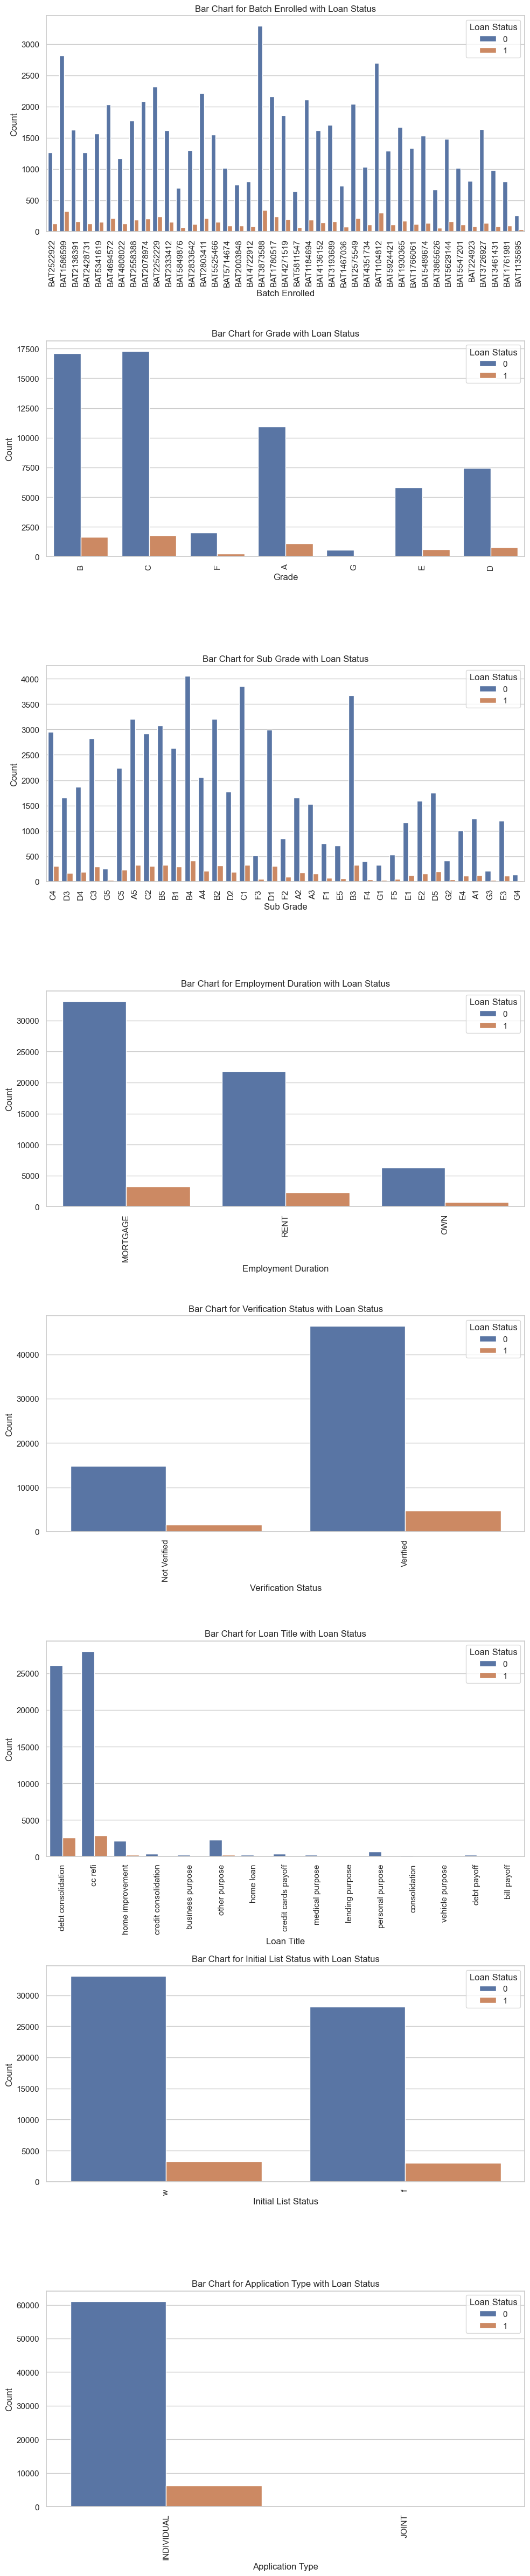

In [13]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 6 * len(categorical_cols)))

# Iterate through categorical columns and create bar charts
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Loan Status', data=df, ax=axes[i])
    axes[i].set_title(f'Bar Chart for {col} with Loan Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\892032181.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratios_df = ratios_df.append({'Variable': col, 'Category': category_value, 'Loan_Status_Ratio': ratio}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\892032181.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratios_df = ratios_df.append({'Variable': col, 'Category': category_value, 'Loan_Status_Ratio': ratio}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\892032181.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratios_df = ratios_df.append({'Variable': col, 'Category': category_value, 'Loan_Status_Ratio': ratio}, ignore_index=True)
C:\Users\Util

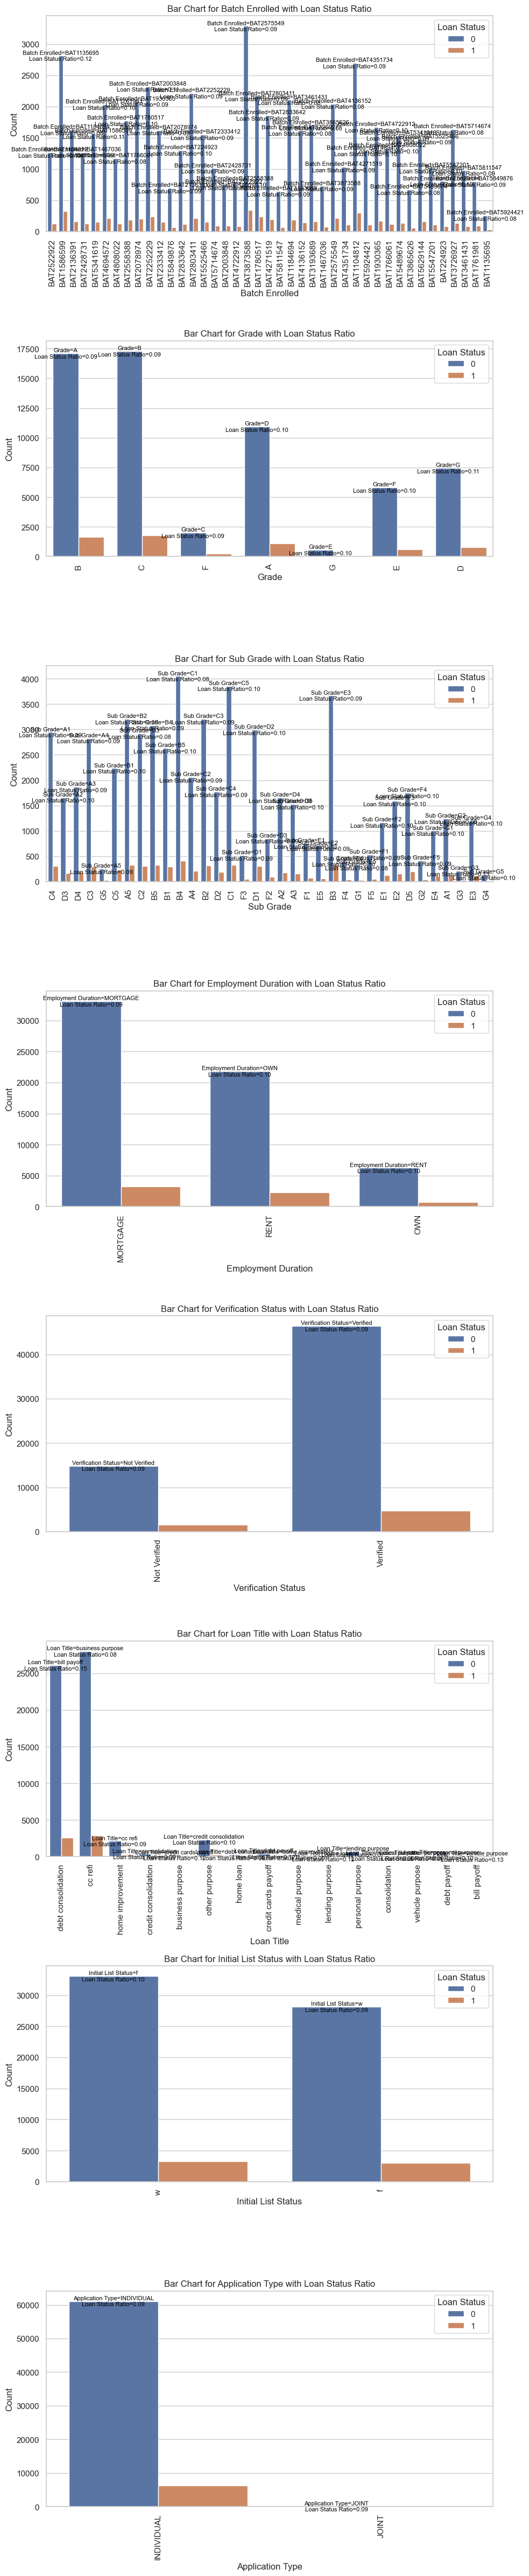

                Variable         Category  Loan_Status_Ratio
0         Batch Enrolled       BAT1104812           0.099800
1         Batch Enrolled       BAT1135695           0.125000
2         Batch Enrolled       BAT1184694           0.083551
3         Batch Enrolled       BAT1467036           0.091022
4         Batch Enrolled       BAT1586599           0.105029
..                   ...              ...                ...
102           Loan Title  vehicle purpose           0.131944
103  Initial List Status                f           0.096714
104  Initial List Status                w           0.088901
105     Application Type       INDIVIDUAL           0.092516
106     Application Type            JOINT           0.089431

[107 rows x 3 columns]


In [14]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 6 * len(categorical_cols)))

# Create a DataFrame to store ratios
ratios_df = pd.DataFrame(columns=['Variable', 'Category', 'Loan_Status_Ratio'])

# Iterate through categorical columns and create bar charts with ratio
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Create a countplot
    sns.countplot(x=col, hue='Loan Status', data=df, ax=ax)
    
    # Rotate x-axis labels vertically
    ax.tick_params(axis='x', rotation=90)
    
    # Calculate and display ratio as text on the bars
    total_counts = df.groupby([col, 'Loan Status']).size().unstack().sum(axis=1)
    ratios = df.groupby([col, 'Loan Status']).size().unstack().div(total_counts, axis=0)
    
    for j, p in enumerate(ax.patches):
        # Check if the index exists in ratios
        if j < len(ratios):
            category_value = ratios.index[j]
            ratio = ratios.iloc[j, 1]  # Assuming 1 is the index for 'Loan_Status' 1
            
            # Store ratios in the DataFrame
            ratios_df = ratios_df.append({'Variable': col, 'Category': category_value, 'Loan_Status_Ratio': ratio}, ignore_index=True)

            ax.text(p.get_x() + p.get_width() / 2.,
                    p.get_height() + 0.02,
                    f'{col}={category_value}\nLoan Status Ratio={ratio:.2f}',
                    ha='center', va='center', rotation=0, fontsize=8, color='black')

    ax.set_title(f'Bar Chart for {col} with Loan Status Ratio')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Display or save the ratios DataFrame
print(ratios_df)

In [15]:
# Set display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
# Print the DataFrame
ratios_df=ratios_df.sort_values(by='Loan_Status_Ratio', ascending=False)
print(ratios_df)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

                Variable              Category  Loan_Status_Ratio
88            Loan Title           bill payoff           0.146341
102           Loan Title       vehicle purpose           0.131944
80             Sub Grade                    G3           0.130081
1         Batch Enrolled            BAT1135695           0.125000
97            Loan Title             home loan           0.122378
95            Loan Title           debt payoff           0.116883
92            Loan Title   credit cards payoff           0.115207
9         Batch Enrolled            BAT2003848           0.108076
47                 Grade                     G           0.106349
4         Batch Enrolled            BAT1586599           0.105029
5         Batch Enrolled            BAT1761981           0.104027
46                 Grade                     F           0.103740
67             Sub Grade                    D5           0.103484
71             Sub Grade                    E4           0.102059
84   Emplo

In [18]:
# Create a new DataFrame to store max and min values
summary_df = pd.DataFrame(columns=['Column', 'Max', 'Min'])

# Populate the summary DataFrame
for col in numeric_cols:
    col_max = df[col].max()
    col_min = df[col].min()
    summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

                          Column          Max          Min
0                    Loan Amount        35000         1014
1                  Funded Amount        34999         1014
2         Funded Amount Investor  34999.74643  1114.590204
3                           Term           59           36
4                  Interest Rate    27.182348     5.320006
5                 Home Ownership  406561.5364  14573.53717
6                Debit to Income    39.629862     0.675299
7        Delinquency - two years            8            0
8          Inquires - six months            5            0
9                   Open Account           37            2
10                 Public Record            4            0
11             Revolving Balance       116933            0
12           Revolving Utilities    100.88005     0.005172
13                Total Accounts           72            4
14       Total Received Interest  14301.36831     4.736746
15       Total Received Late Fee    42.618882     0.0000

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning:

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df)

       Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0         0.264403       0.918699                0.330964   1.0   
1         0.076355       0.321495                0.326910   1.0   
2         0.802154       0.244137                0.604649   1.0   
3         0.298829       0.174783                0.494688   1.0   
4         0.467134       0.359335                0.366690   1.0   
...            ...            ...                     ...   ...   
67458     0.370358       0.171664                0.355929   1.0   
67459     0.215059       0.295189                0.428591   1.0   
67460     0.437916       0.938855                0.330967   1.0   
67461     0.457630       0.116551                0.597285   1.0   
67462     0.421909       0.849228                0.386389   1.0   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0         BAT2522922       0.265983     B        C4            MORTGAGE   
1         BAT1586599       0.316414     C    

In [25]:

summary_df = pd.DataFrame(columns=['Column', 'Max', 'Min'])

# Populate the summary DataFrame
for col in numeric_cols:
    col_max = df[col].max()
    col_min = df[col].min()
    summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

                          Column  Max  Min
0                    Loan Amount  1.0  0.0
1                  Funded Amount  1.0  0.0
2         Funded Amount Investor  1.0  0.0
3                           Term  1.0  0.0
4                  Interest Rate  1.0  0.0
5                 Home Ownership  1.0  0.0
6                Debit to Income  1.0  0.0
7        Delinquency - two years  1.0  0.0
8          Inquires - six months  1.0  0.0
9                   Open Account  1.0  0.0
10                 Public Record  1.0  0.0
11             Revolving Balance  1.0  0.0
12           Revolving Utilities  1.0  0.0
13                Total Accounts  1.0  0.0
14       Total Received Interest  1.0  0.0
15       Total Received Late Fee  1.0  0.0
16                    Recoveries  1.0  0.0
17       Collection Recovery Fee  1.0  0.0
18  Collection 12 months Medical  1.0  0.0
19                 Last week Pay  1.0  0.0
20       Total Collection Amount  1.0  0.0
21         Total Current Balance  1.0  0.0
22  Total R

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column': col, 'Max': col_max, 'Min': col_min}, ignore_index=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_1828\1800801461.py:8: FutureWarning:

In [27]:
pd.set_option('display.max_columns', None)
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0.264403,0.918699,0.330964,1.0,BAT2522922,0.265983,B,C4,MORTGAGE,0.412699,Not Verified,debt consolidation,0.400709,0.125,0.0,0.314286,0.00,0.207350,0.742775,0.044118,w,0.204587,0.002395,0.000574,0.004757,0.0,INDIVIDUAL,0.304348,0.001827,0.264009,0.028071,0.0
1,0.076355,0.321495,0.326910,1.0,BAT1586599,0.316414,C,D3,RENT,0.064442,Verified,debt consolidation,0.378315,0.000,0.0,0.285714,0.00,0.006944,0.776130,0.132353,f,0.053721,0.000849,0.000546,0.005843,0.0,INDIVIDUAL,0.677019,0.003167,0.154651,0.099341,0.0
2,0.802154,0.244137,0.604649,1.0,BAT2136391,0.330517,F,D4,MORTGAGE,0.196264,Verified,debt consolidation,0.704983,0.000,0.0,0.342857,0.00,0.015761,0.020499,0.235294,w,0.060055,0.440618,0.000991,0.006114,0.0,INDIVIDUAL,0.409938,0.002010,0.075786,0.125669,0.0
3,0.298829,0.174783,0.494688,1.0,BAT2428731,0.521957,C,C3,MORTGAGE,0.239071,Verified,debt consolidation,0.445864,0.125,0.0,0.142857,0.00,0.118179,0.668777,0.117647,w,0.019825,0.001035,0.000025,0.004495,0.0,INDIVIDUAL,0.242236,0.002375,0.007284,0.295820,0.0
4,0.467134,0.359335,0.366690,1.0,BAT5341619,0.443150,C,D4,MORTGAGE,0.075669,Verified,cc refi,0.424458,0.125,0.6,0.314286,0.25,0.013204,0.845063,0.264706,w,0.008709,0.453007,0.297354,0.002211,0.0,INDIVIDUAL,0.111801,0.026127,0.106571,0.107804,0.0
